# Software Evolution - Practical Session
## Laws of software evolution based on code counting
## Academic year 2023-2024

### Write your answers under the questions that are present in this notebook  

#### Note: Print the final output of each cell in this notebook

#### Read the provided description document before proceeding with the following notebook

## 1.  Data preprocessing

To install packages, use :

pip install tqdm  pandas numpy matplotlib scikit-learn

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from permetrics.regression import RegressionMetric
from scipy.optimize import curve_fit

### Import dataset

First, import the dataset that contains the total lines of code, total blank lines, total comment lines, total number of files, and release date for each tag.

In [202]:
# WRITE YOUR CODE HERE
# Load the data
growth_data = pd.read_csv('data/LawIncreasingGrowthDataset.csv')

### Dataset A : Major.Minor.Patch tag format

Filter out non-official releases such as alpha, beta, release candidates, milestones, branches, and unnumbered tags. Additionally, version numbers typically follow a Major.Minor.Patch format, but exceptions exist (e.g., 1.4, 3.3.0.1, 4.3.0.1, or 4.3.1.1). Versions with more than three components are disregarded, and two-component versions are treated as implicit three-component versions (e.g., 1.4 is interpreted as 1.4.0).  

Write a regular expression statement to identify tags following semantic versioning (major.minor.patch) guidelines. You can use the pattern: '^v?[0-9]+\.[0-9]+(\.[0-9]+)?$'  

Once you've applied this regex, print out the selected major.minor.patch dataset.

In [203]:
# WRITE YOUR CODE HERE
df_a = growth_data[growth_data['tag'].str.contains(r'^v?[0-9]+.[0-9]+(.[0-9]+)?$')]
# reset the index
df_a

/tmp/ipykernel_197340/2247524041.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_a = growth_data[growth_data['tag'].str.contains(r'^v?[0-9]+.[0-9]+(.[0-9]+)?$')]


,tag,code,blank,comment,nFiles,release_date
0,1.4,48551,8727,11154,419,2009-01-06
1,1.5.0,63240,11018,18457,512,2009-02-18
3,1.5.1,67939,11618,18131,600,2009-08-05
4,1.5.2,68564,11555,11906,611,2009-08-17
6,1.6.1,86799,14582,41327,744,2009-11-05
9,2.0.0,115586,18488,42717,1074,2010-06-05
10,2.0.1,115699,18492,42724,1074,2010-07-06
21,3.0.0,188246,29836,60879,1694,2012-02-07
22,3.0.1,189022,29945,61587,1696,2012-03-12
26,3.1.0,191269,29973,62628,1642,2012-06-22


### Dataset B : Major.Minor tag format

Starting from the previous data (**Dataset A**),  for each Major.Minor.Patch tag group, select the earliest version (e.g., for a set of 4.4.0, 4.4.1, and 4.4.2, consider 4.4.0 and rename it to 4.4).

In [204]:
# WRITE YOUR CODE HERE
# Select the earlist version for each tag : 4.4.0, 4.4.1, and 4.4.2, consider 4.4.0 and rename it to 4.4
# Delete row where patch is != .0
df_b = df_a.copy(deep=True)
df_b["Major_Minor"] = df_b["tag"].apply(lambda x: ".".join(x.split(".")[:2]))
df_b = df_b.groupby("Major_Minor", as_index=False).first()
df_b.drop(columns=["Major_Minor"], inplace=True)
df_b["tag"] = df_b["tag"].str.extract(r"^(\d+.\d+)")
df_b

,tag,code,blank,comment,nFiles,release_date
0,1.4,48551,8727,11154,419,2009-01-06
1,1.5,63240,11018,18457,512,2009-02-18
2,1.6,86799,14582,41327,744,2009-11-05
3,2.0,115586,18488,42717,1074,2010-06-05
4,3.0,188246,29836,60879,1694,2012-02-07
5,3.1,191269,29973,62628,1642,2012-06-22
6,3.2,257934,43596,119688,2004,2012-12-17
7,3.3,350914,58798,159566,2682,2013-06-20
8,3.4,291555,48371,149981,2367,2013-10-24
9,4.0,357375,57707,159944,2790,2014-05-30


## 2. Law of Increasing Growth

### Software project's metrics

Visualize four plots representing the evolution of a software project's metrics, including the number of lines of code, blank lines, comment lines, and the number of files, as follows:  

1. Plot the metrics against software version numbers:  
   1.1) For version tags of the format major.minor.patch.  
   1.2) For version tags of the format major.minor.  
   Place these plots at positions (0,0) and (0,1) respectively.  
  
2. Plot the metrics against dates:  
   2.1) For version tags of the format major.minor.patch.  
   2.2) For version tags of the format major.minor.  
   Place these plots right below the corresponding version-based plots, at positions (1,0) and (1,1).  

Hint: Ensure proper datetime formatting for the dates in the datasets instead of storing them as strings.

For example, if you're working with a DataFrame:

fig, axes = plt.subplots(2, 2, figsize=(18, 10))  
dataset_a[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True)  
.....  

axes[0, 0].set_xlabel('Major.Minor.Patch versions')  
.....  

plt.tight_layout()  
plt.show()

Text(0.5, 0, 'Release Date')

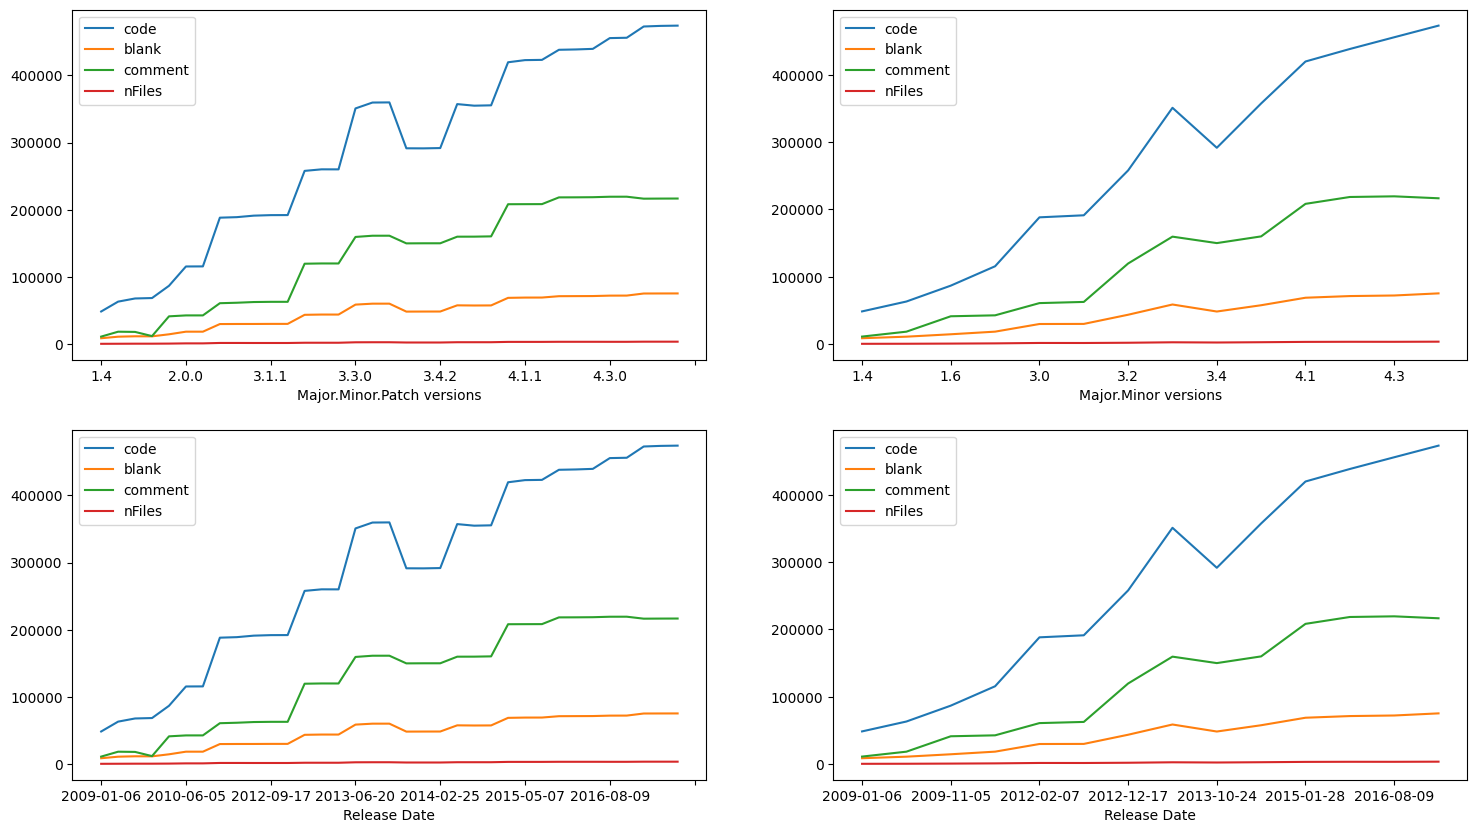

In [205]:
# WRITE YOUR CODE HERE
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
df_a[['code','blank','comment','nFiles','tag']].plot(x='tag',ax=axes[0,0],legend=True)
df_b[['code','blank','comment','nFiles','tag']].plot(x='tag',ax=axes[0,1],legend=True)
df_a[['code','blank','comment','nFiles','release_date']].plot(x='release_date',ax=axes[1,0],legend=True)
df_b[['code','blank','comment','nFiles','release_date']].plot(x='release_date',ax=axes[1,1],legend=True)


axes[0,0].set_xlabel('Major.Minor.Patch versions')
axes[0,1].set_xlabel('Major.Minor versions')
axes[1,0].set_xlabel('Release Date')
axes[1,1].set_xlabel('Release Date')

### Questions:

1. Do you find any difference between the plot that is having date in the x-axis and the plot that is having tag in the x-axis? If yes, then what is the difference? If no, then why is it same?

No, it's the same since we are considering only the version and not the alpha, beta,.... Thus, the versions are released in order. (When 4.0 is released, they don't release 3.9 after that)
(I think it's the case for this specific repository)

2. Which type of plot is preferable for software evolution analysis?   
    a) date in x-axis  
    b) tag in x-axis  
Why?

The date in x-axis since you can also modify the tags or add new tags in between the existing tags. The date is fixed and can't be changed.
Moreover, we can also spot the pauses between the releases with the date in x-axis.

### Correlation 

Correlation is generally used to analyse the relationship between variables. Here, analyse the relationship between the number of lines of code and the number of files using Spearman correlation and Pearson correlation by considering **Dataset A**. Report the correlation upto 3 decimal places.

Spearman correlation: 0.986
Pearson correlation: 0.998


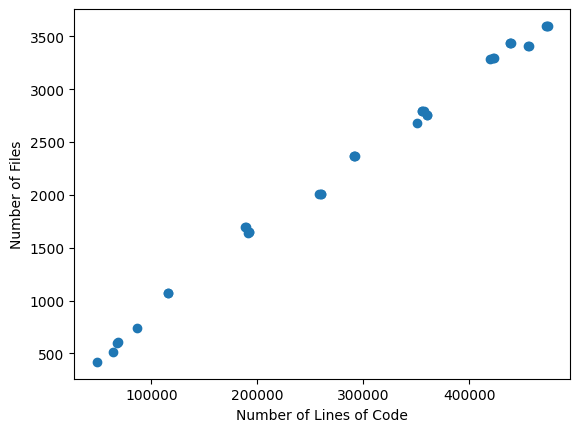

In [206]:
from scipy.stats import spearmanr, pearsonr
spearman_corr, spearman_p_value = spearmanr(df_a['code'], df_a['nFiles'])

# Calculate Pearson correlation
pearson_corr, pearson_p_value = pearsonr(df_a['code'], df_a['nFiles'])

plt.scatter(df_a['code'], df_a['nFiles'])
plt.xlabel("Number of Lines of Code")
plt.ylabel("Number of Files")

# Report the correlations
print(f"Spearman correlation: {spearman_corr:.3f}")
print(f"Pearson correlation: {pearson_corr:.3f}")



### Questions:

3. Do you find any difference in correlation values between Pearson and Spearman? Which correlation measure is preferable for this use case? why?

There is a very light difference in the correlation values between Pearson and Spearman.
In this case, I think the Pearson correlation is preferable since the relationship between the number of lines of code and the number of files is linear.

4. Based on the above correlation value, please give your opinion on the relation between the number of lines and the number of files? Which of both size metrics do you propose to use in the remainder of your analysis?

They are both highly correlated which is not surprising. I would choose lines of codes since it feels more representative because it's more detailed than the number of files.

### Regression analysis

Visualize a linear regression analysis of the relationship between the release date and the total number of files by considering **Dataset B**.  

Hint:

1. Prepare the data: Convert the release date to integers and set number of files as the target variable.  
2. Apply linear regression analysis to understand the relationship between the release date and the total number of files.  
3. Calculate Mean Relative Error and ajusted R-squared metrics.    
4. Generate a scatter plot showing the release dates against the total number of files. Then, overlay the linear regression line on the plot.


Mean Absolute Error: 142.29
Adjusted R-squared: 0.97


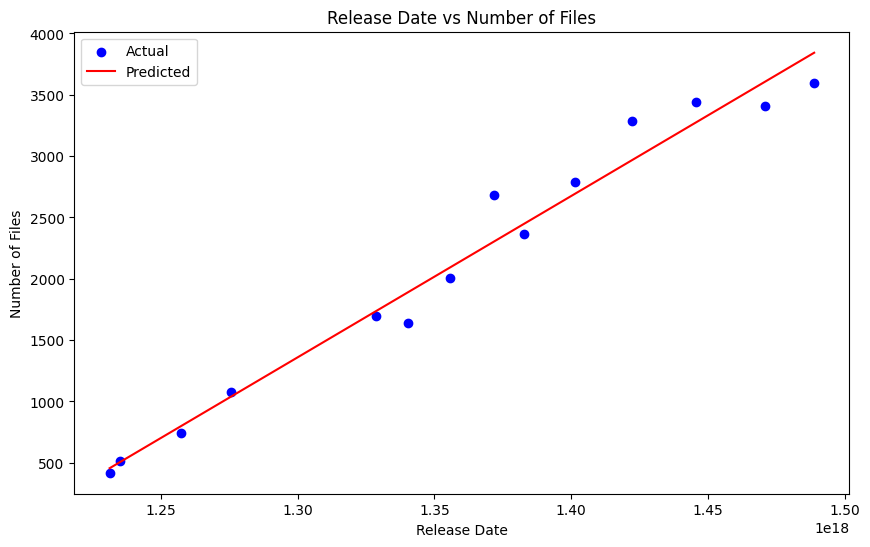

In [207]:
# Convert the release date to integers
df_b["release_date"] = pd.to_datetime(df_b["release_date"]).astype(int)

# Set the target variable
y = df_b[["nFiles"]].to_numpy()  # Extracting as a Series instead of DataFrame
x = df_b[["release_date"]].to_numpy()


# apply linear regression analysis
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate Mean Relative Error and adjusted R-squared metrics using the custom function
metric = RegressionMetric()
mae = metric.mean_absolute_error(y, y_pred)
adjusted_r2 = metric.adjusted_coefficient_of_determination(y, y_pred, x.shape)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")

# Generate a scatter plot showing the release dates against the total number of files
plt.figure(figsize=(10, 6))
plt.scatter(df_b["release_date"], y, color="blue", label="Actual")
plt.plot(df_b["release_date"], y_pred, color="red", label="Predicted")
plt.xlabel("Release Date")
plt.ylabel("Number of Files")
plt.title("Release Date vs Number of Files")
plt.legend()
plt.show()

### Questions:

5. Choose an option regarding the growth of the software. Motivate your choice using the 2D regression plot.  
    a) Linear  
    b) Sub-linear  
    c) Super-linear  

The growth of the software is linear. The number of files is increasing linearly with the release date.

6. Report the MRE and ajusted R-squared values.

Mean Absolute Error: 142.29
Adjusted R-squared: 0.97

### Fitting & forecasting

Using **Dataset A**, apply parametric regression models (e.g., linear, exponential, power, quadratic, logarithmic) to predict the number of files in software releases based on historical data.

**Steps:**

1. Prepare Data:
   - Convert "release_date" to datetime format.
   - Calculate "release_days" as the number of days since the earliest release.

2. Split Data:
   - Separate data into features (release days) and target variable (number of files).
   - Split data into training and testing sets from the earliest release up to a specific point.

3. Build and Train Models:
   - Define regression models.
   - Fit models to training data (maybe using `curve_fit` from SciPy).

4. Forecast Future Data:
   - Predict the number of files for future release days using trained models.

5. Visualize Results:
   - Plot original data and forecasted values for each regression model.

6. Evaluate Models:
   - Calculate adjusted R-squared and mean relative error for each model using training and test data.

In [208]:
# WRITE YOUR CODE HERE
# 1
df_a['release_date'] = pd.to_datetime(df_a['release_date'])

# Calculate "release_days" as the number of days since the earliest release
df_a['release_days'] = (df_a['release_date'] - df_a['release_date'].min()).dt.days

df_a

/tmp/ipykernel_197340/2480690314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['release_date'] = pd.to_datetime(df_a['release_date'])
/tmp/ipykernel_197340/2480690314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['release_days'] = (df_a['release_date'] - df_a['release_date'].min()).dt.days


,tag,code,blank,comment,nFiles,release_date,release_days
0,1.4,48551,8727,11154,419,2009-01-06,0
1,1.5.0,63240,11018,18457,512,2009-02-18,43
3,1.5.1,67939,11618,18131,600,2009-08-05,211
4,1.5.2,68564,11555,11906,611,2009-08-17,223
6,1.6.1,86799,14582,41327,744,2009-11-05,303
9,2.0.0,115586,18488,42717,1074,2010-06-05,515
10,2.0.1,115699,18492,42724,1074,2010-07-06,546
21,3.0.0,188246,29836,60879,1694,2012-02-07,1127
22,3.0.1,189022,29945,61587,1696,2012-03-12,1161
26,3.1.0,191269,29973,62628,1642,2012-06-22,1263


In [209]:
# WRITE YOUR CODE HERE
# 2

x = df_a['release_days']
y = df_a['nFiles']

# Split data into training and testing sets from the earliest release up to a specific point
split_point = 0.7

# Get dataset up to the split point in dataframe
split_index = int(len(x) * split_point)
x_train = x[:split_index].to_numpy().reshape(-1, 1)
y_train = y[:split_index].to_numpy()

x_test = x[split_index:].to_numpy().reshape(-1, 1)
y_test = y[split_index:].to_numpy()



In [210]:
# WRITE YOUR CODE HERE
# 3
# Define regression models
def linear(val, a, b):
    return a * val + b

def exponential(val, a, b):
    return a * np.exp(b * val)

def power(val, a, b):
    return a * val ** b

def quadratic(val, a, b, c):
    return a * val ** 2 + b * val + c

# Fit models to training data
linear_params, pcov = curve_fit(linear, x_train.squeeze(), y_train)
exponential_params, _ = curve_fit(exponential, x_train.squeeze(), y_train, p0=(1, 0.01))
power_params, _ = curve_fit(power, x_train.squeeze(), y_train)
quadratic_params, _ = curve_fit(quadratic, x_train.squeeze(), y_train)

# Print params
print(f"Linear: {linear_params}")
print(f"Exponential: {exponential_params}")
print(f"Power: {power_params}")
print(f"Quadratic: {quadratic_params}")

Linear: [  1.16196742 377.50215521]
Exponential: [6.73635182e+02 7.22500454e-04]
Power: [9.38377572 0.74296086]
Quadratic: [1.26003757e-04 9.02816038e-01 4.49577783e+02]


In [211]:
# WRITE YOUR CODE HERE
# 4
# Predict the number of files for future release days using trained models


all_pred_lin = linear(x, linear_params[0], linear_params[1])
all_pred_exp = exponential(x, exponential_params[0], exponential_params[1])
all_pred_pow = power(x, power_params[0], power_params[1])
all_pred_quad = quadratic(x, quadratic_params[0], quadratic_params[1], quadratic_params[2])


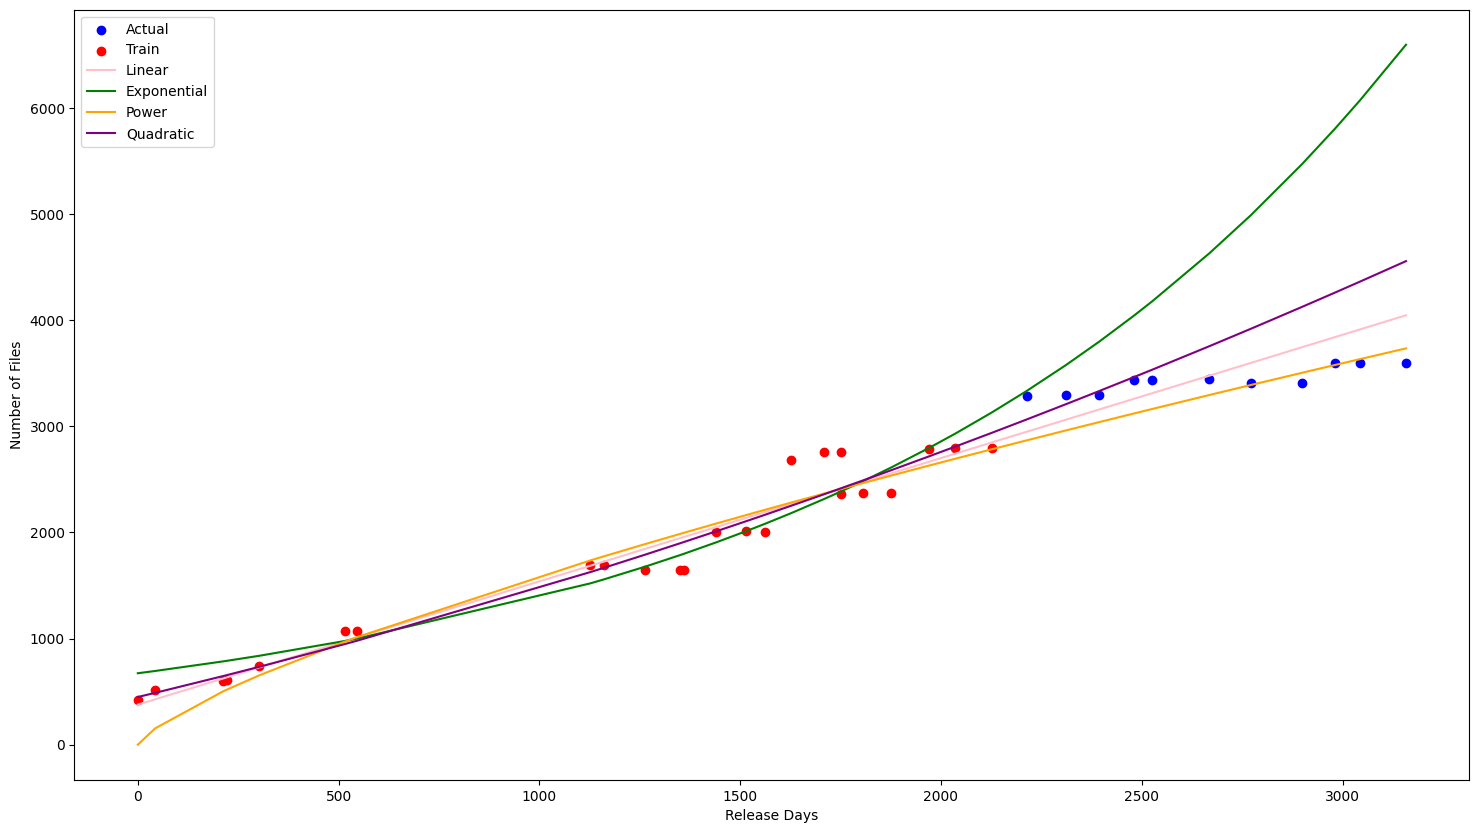

In [212]:
# WRITE YOUR CODE HERE
# 5
# Plot original data and forecasted values for each regression model
plt.figure(figsize=(18, 10))
plt.scatter(x_test, y_test, color="blue", label="Actual")
plt.scatter(x_train, y_train, color="red", label="Train")
plt.plot(x, all_pred_lin, color="pink", label="Linear")
plt.plot(x, all_pred_exp, color="green", label="Exponential")
plt.plot(x, all_pred_pow, color="orange", label="Power")
plt.plot(x, all_pred_quad, color="purple", label="Quadratic")
plt.xlabel("Release Days")
plt.ylabel("Number of Files")
plt.legend()
plt.show()


In [213]:
from sklearn.metrics import r2_score
# WRITE YOUR CODE HERE
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 6
# Calculate adjusted R-squared and mean relative error for each model using training and test data
y_pred_lin = linear(x_test.squeeze(), *linear_params)
y_pred_exp = exponential(x_test.squeeze(), *exponential_params)
y_pred_pow = power(x_test.squeeze(), *power_params)
y_pred_quad = quadratic(x_test.squeeze(), *quadratic_params)

# Since there is only one predictor, the adjusted R-squared is the same as the R-squared.
      
mae_lin = mean_relative_error(y_test, y_pred_lin)
R2_lin = r2_score(y_test, y_pred_lin)
print(" ============ Linear ============")
print(f"Mean Absolute Error: {mae_lin:.2f}")
print(f"R-squared: {R2_lin:.2f}")

mae_exp = mean_relative_error(y_test, y_pred_exp)
R2_exp = r2_score(y_test, y_pred_exp)
print(" ============ Exponential ============")
print(f"Mean Absolute Error: {mae_exp:.2f}")
print(f"R-squared: {R2_exp:.2f}")

mae_pow = mean_relative_error(y_test, y_pred_pow)
R2_pow = r2_score(y_test, y_pred_pow)
print(" ============ Power ============")
print(f"Mean Absolute Error: {mae_pow:.2f}")
print(f"R-squared: {R2_pow:.2f}")

mae_quad = mean_relative_error(y_test, y_pred_quad)
R2_quad = r2_score(y_test, y_pred_quad)
print(" ============ Quadratic ============")
print(f"Mean Absolute Error: {mae_quad:.2f}")
print(f"R-squared: {R2_quad:.2f}")


 ============ Linear ============
Mean Absolute Error: 6.81
R-squared: -4.15
 ============ Exponential ============
Mean Absolute Error: 38.19
R-squared: -202.18
 ============ Power ============
Mean Absolute Error: 5.50
R-squared: -2.96
 ============ Quadratic ============
Mean Absolute Error: 11.43
R-squared: -18.99


In [214]:
# These values seem weird but with a random split they seem to be correct. I don't really know how to solve this problem. 

from sklearn.model_selection import train_test_split

X = df_a[['release_days']]
y = df_a['nFiles']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_params, _ = curve_fit(linear, x_train.squeeze(), y_train)
exponential_params, _ = curve_fit(exponential, x_train.squeeze(), y_train, p0=(1, 0.01))
power_params, _ = curve_fit(power, x_train.squeeze(), y_train)
quadratic_params, _ = curve_fit(quadratic, x_train.squeeze(), y_train)

y_pred_lin = linear(x_test.squeeze(), *linear_params)
y_pred_exp = exponential(x_test.squeeze(), *exponential_params)
y_pred_pow = power(x_test.squeeze(), *power_params)
y_pred_quad = quadratic(x_test.squeeze(), *quadratic_params)

# Since there is only one predictor, the adjusted R-squared is the same as the R-squared.
      
mae_lin = mean_relative_error(y_test, y_pred_lin)
R2_lin = r2_score(y_test, y_pred_lin)
print(" ============ Linear ============")
print(f"Mean Absolute Error: {mae_lin:.2f}")
print(f"R-squared: {R2_lin:.2f}")

mae_exp = mean_relative_error(y_test, y_pred_exp)
R2_exp = r2_score(y_test, y_pred_exp)
print(" ============ Exponential ============")
print(f"Mean Absolute Error: {mae_exp:.2f}")
print(f"R-squared: {R2_exp:.2f}")

mae_pow = mean_relative_error(y_test, y_pred_pow)
R2_pow = r2_score(y_test, y_pred_pow)
print(" ============ Power ============")
print(f"Mean Absolute Error: {mae_pow:.2f}")
print(f"R-squared: {R2_pow:.2f}")

mae_quad = mean_relative_error(y_test, y_pred_quad)
R2_quad = r2_score(y_test, y_pred_quad)
print(" ============ Quadratic ============")
print(f"Mean Absolute Error: {mae_quad:.2f}")
print(f"R-squared: {R2_quad:.2f}")

 ============ Linear ============
Mean Absolute Error: 7.56
R-squared: 0.70
 ============ Exponential ============
Mean Absolute Error: 11.93
R-squared: 0.32
 ============ Power ============
Mean Absolute Error: 7.79
R-squared: 0.75
 ============ Quadratic ============
Mean Absolute Error: 7.64
R-squared: 0.74


### Questions:

7. Which regression model do you prefer for assessing the goodness of fit, based on the evaluation metrics scores? Why?

8. Which regression model do you prefer for assessing forecast accuracy, based on the evaluation metrics scores? Why?

### Modify the CLOC parameters

Exclude all bank lines and verify if the Law of Increasing Growth applies after this filtering

In [215]:
# WRITE YOUR CODE HERE

Exclude all comment lines and verify if the Law of Increasing Growth applies after this filtering

In [216]:
# WRITE YOUR CODE HERE

## 3. Law of Continuing Change

### Dataset A : Major.Minor.Patch tag format

Import Dataset A that contains number of lines of code that are added, modified, removed and same between two consecutive tags for the three component versions (major.minor.patch)

In [217]:
# WRITE YOUR CODE HERE
df_a = pd.read_csv('data/LawContinuingChangeDatasetA.csv')
df_a

,first_tag,second_tag,added,same,modified,removed,date
0,1.4,1.5.0,2681,43708,2162,17370,2009-02-18
1,1.5.0,1.5.1,34218,25802,3220,38813,2009-08-05
2,1.5.1,1.5.2,18832,46583,2420,19665,2009-08-17
3,1.5.2,1.6.1,10056,50312,8300,28187,2009-11-05
4,1.6.1,2.0.0,24236,55784,6779,53023,2010-06-05
5,2.0.0,2.0.1,4,115527,55,117,2010-07-06
6,2.0.1,3.0.0,49353,56547,9799,121900,2012-02-07
7,3.0.0,3.0.1,34,188138,74,810,2012-03-12
8,3.0.1,3.1.0,9059,176395,3568,11306,2012-06-22
9,3.1.0,3.1.1,77,191025,167,834,2012-09-17


Create a plot displaying all features together. Show the outcomes with dates on the x-axis and the corresponding numbers on the y-axis.

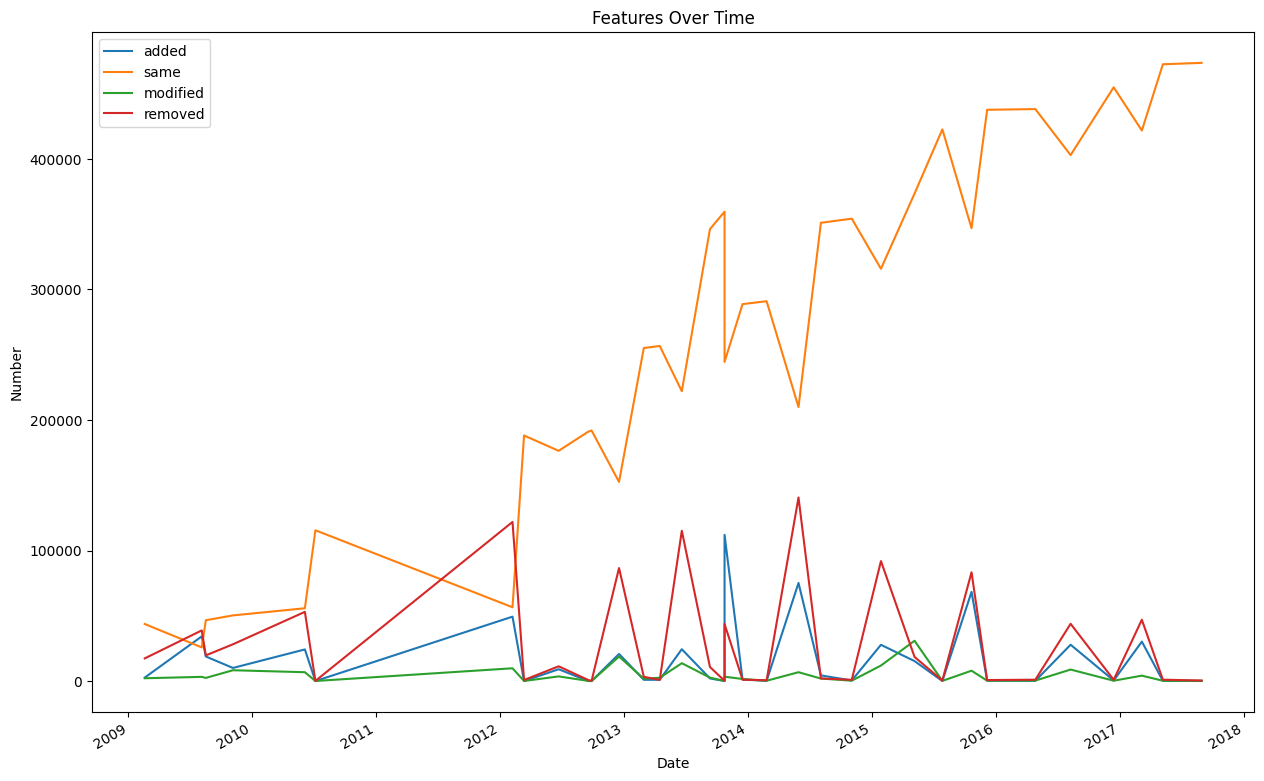

In [218]:
# WRITE YOUR CODE HERE
df_a['date'] = pd.to_datetime(df_a['date'])

df_a.set_index('date', inplace=True)

df_a.plot(figsize=(15,10))

plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Features Over Time')
plt.legend()
plt.show()

### Dataset B : Major.Minor tag format

Import Dataset B that contains number of lines of code that are added, modified, removed and same between two consecutive tags for the minor versions (major.minor)

In [219]:
# WRITE YOUR CODE HERE

df_b = pd.read_csv('data/LawContinuingChangeDatasetB.csv')
df_b

,first_tag,second_tag,added,same,modified,removed,date
0,1.4,1.5.0,2681,43708,2162,17370,2009-02-18
1,1.5.0,1.6.1,38753,21466,3021,62312,2009-11-05
2,1.6.1,2.0.0,24236,55784,6779,53023,2010-06-05
3,2.0.0,3.0.0,49339,56466,9781,121999,2012-02-07
4,3.0.0,3.1.0,9091,175549,3606,12114,2012-06-22
5,3.1.0,3.2.0,20765,151608,18896,87430,2012-12-17
6,3.2.0,3.3.0,25240,216618,16076,118220,2013-06-20
7,3.3.0,3.4.0,104598,242521,3795,45239,2013-10-24
8,3.4.0,4.0.0,75798,208717,7040,141618,2014-05-30
9,4.0.0,4.1.0,27544,318189,11642,89832,2015-01-28


Produce a plot where all features are represented together. Present the outcomes with dates on the x-axis and the corresponding numbers on the y-axis.

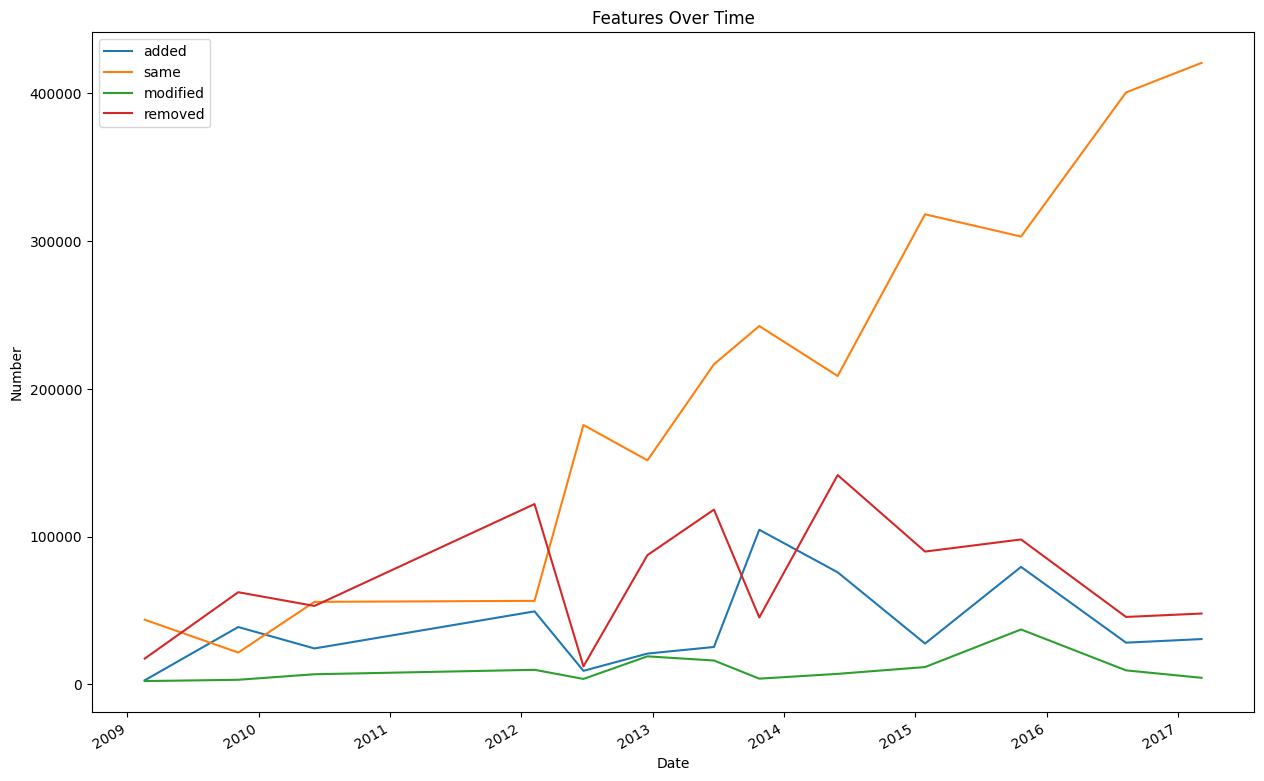

In [220]:
# WRITE YOUR CODE HERE
df_b['date'] = pd.to_datetime(df_b['date'])

df_b.set_index('date', inplace=True)

df_b.plot(figsize=(15,10))

plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Features Over Time')
plt.legend()
plt.show()

### Question:

1. Do you find empirical support for the Law of Continuing Change ? Motivate your response.

Yes, we see that lines are added / modified / deleted continually which correspond to the first low "Continuing change" and "Continuing Growth"